### 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = '/content/drive/MyDrive/data/bike-sharing-demand/'
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
sampleSubmission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv')

###Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [4]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [5]:
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [6]:
sampleSubmission.head(1)

,datetime,count
0,2011-01-20 00:00:00,0


## 탐색적 자료 분석
- datetime : 1시간 간격 데이터 수집
- season :
 + 1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울
- holiday
 + 0 : 공휴일 아님, 1 : 공휴일
- workingday
 + 0 : 평일이 아님, 1 : 평일
- weather
 + 1 : 맑음, 2 : 약간 흐림, 3 : 약한 눈, 비, 4 : 폭우, 폭설(기상 매우 안좋은 상태)

- 종속변수 : count(자전거 대여 수량)

## 문제 정의
- 각 시간대별로 자전거 대여 수량을 예측 하세요 !

## 데이터 확인
- casual, registered가 훈련데이터에 존재, 테스트 데이터에는 현재 없는 상황
 + casual : 비회원수
 + registered : 회원수


## 날짜 데이터 변환

In [7]:
'''
# text = "2011-01-20 00:00:00"
# datetime64[ns] 타입일 시

train['date'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head(1)
'''

'\n# text = "2011-01-20 00:00:00"\n# datetime64[ns] 타입일 시\n\ntrain[\'date\'] = pd.to_datetime(train[\'datetime\'])\ntrain[\'year\'] = train[\'datetime\'].dt.year\ntrain[\'month\'] = train[\'datetime\'].dt.month\ntrain[\'day\'] = train[\'datetime\'].dt.day\ntrain[\'hour\'] = train[\'datetime\'].dt.hour\ntrain[\'minute\'] = train[\'datetime\'].dt.minute\ntrain[\'second\'] = train[\'datetime\'].dt.second\ntrain.head(1)\n'

In [8]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [9]:
# 'datetime' 열의 문자열로 분할하여 날짜 정보 추출
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

train['year'] = train['date'].apply(lambda x: x.split('-')[0])
train['month'] = train['date'].apply(lambda x: x.split('-')[1])
train['day'] = train['date'].apply(lambda x: x.split('-')[2])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

'''
# 사용한 임시 열 제거
train.drop(['date'], axis=1, inplace=True)
'''

"\n# 사용한 임시 열 제거\ntrain.drop(['date'], axis=1, inplace=True)\n"

In [10]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00


In [11]:
from datetime import datetime
import calendar

sample_dt = train['date'][300] # 날짜
print(datetime.strptime(sample_dt, "%Y-%m-%d")) # datetime 타입으로 변경
print(datetime.strptime(sample_dt, "%Y-%m-%d").weekday()) # datetime 타입으로 변경
print(calendar.day_name[3]) # Thursday 로 변환

2011-01-13 00:00:00
3
Thursday


In [12]:
train['weekday'] = train['date'].apply(
    lambda x : calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()]
)
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


In [13]:
# season
train['season'] = train['season'].map({1 : "봄", 2 : "여름", 3 : "가을", 4 : "겨울" ,})

# weather
train['weather'] = train['weather'].map({1 : "맑음", 2 : "약간흐림", 3 : "약한강우", 4 : "강한강우" ,})

train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


16 = a * season + b * holiday + c * working + ... +
32 = 4 * 8
16 = 4 * 4

winspeed 5 기상예보 그 다음날 대여량 20

## 시각화 코드 작성
- count = 기울기 x 1 + x2 + x3
- 종속변수(=반응변수)가 제일 중요한 변수
- 시각화를 구현한다.
- count는 고정값
 + count 수치데이터를 기반으로 한 시각화의 종류 파악
 + 히스토그램 : count
 + 산점도 : y = count, x = 수치형 변수
 + 히트맵 : 수치형 vs 수치형
 + 막대그래프, 박스플롯, 선 그래프 : x = 범주, 날짜 y = count

### 나눔고딕 한글폰트 설치
- 설치 후 런타임 재시작 必

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 테스트

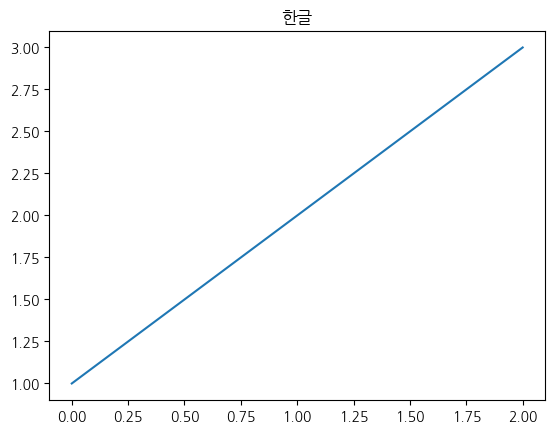

In [20]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

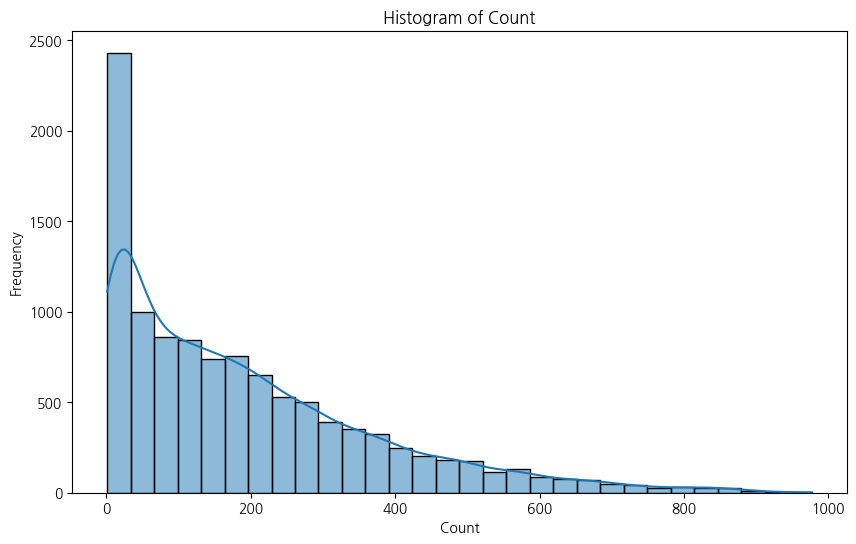

In [16]:
# 히스토그램
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['count'], bins=30, kde=True)  # 히스토그램 및 KDE 플롯
plt.title('Histogram of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

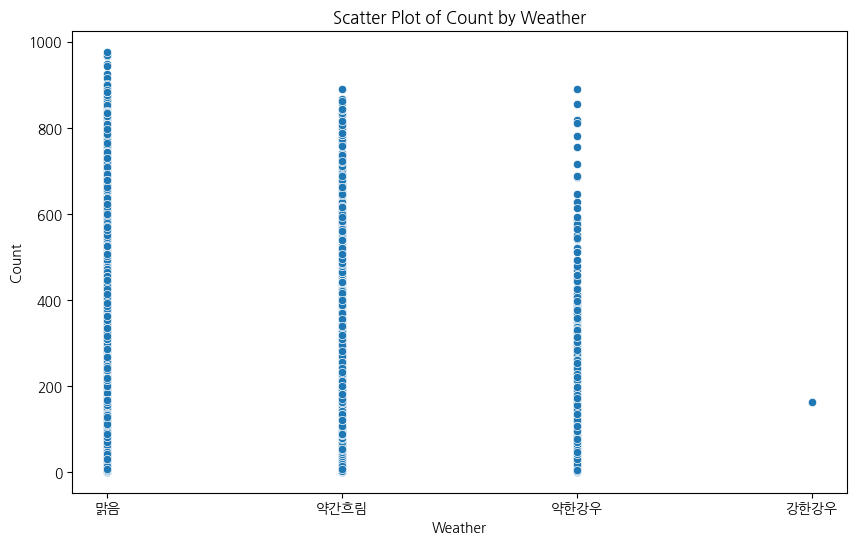

In [17]:
# 산점도 그래프
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10 , 6))
sns.scatterplot(data=train, x='weather', y='count')
plt.title('Scatter Plot of Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

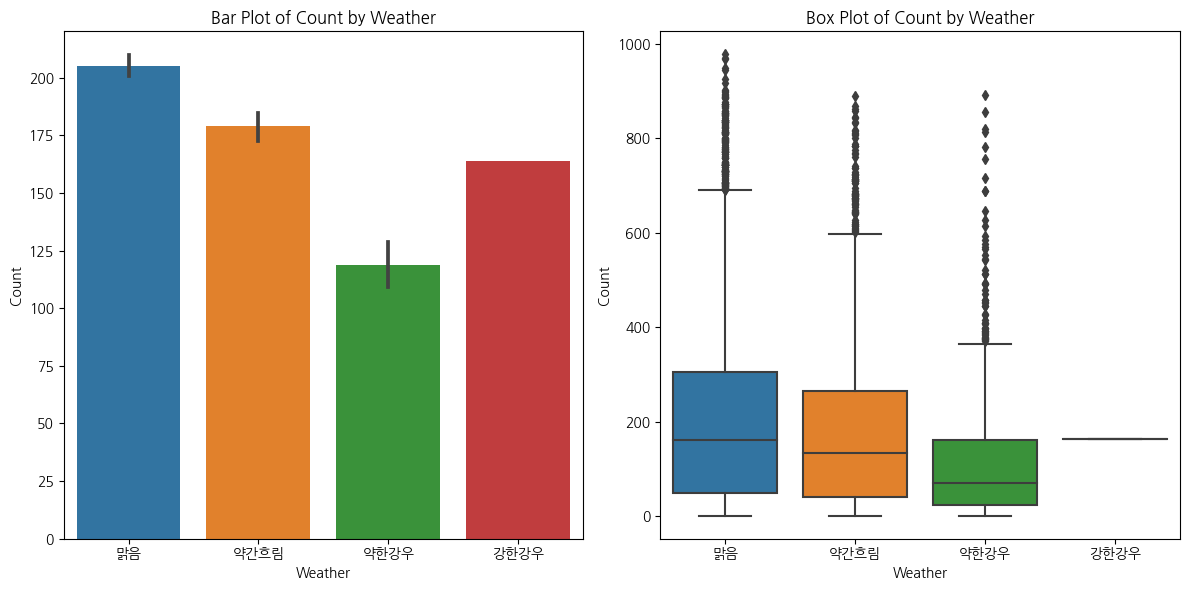

In [19]:
# 막대 그래프, 박스 플롯
import seaborn as sns
import matplotlib.pyplot as plt

# 막대 그래프와 박스 플롯을 함께 그리기 위해 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 막대 그래프 그리기
sns.barplot(data=train, x='weather', y='count', ax=ax1)
ax1.set_title('Bar Plot of Count by Weather')
ax1.set_xlabel('Weather')
ax1.set_ylabel('Count')

# 박스 플롯 그리기
sns.boxplot(data=train, x='weather', y='count', ax=ax2)
ax2.set_title('Box Plot of Count by Weather')
ax2.set_xlabel('Weather')
ax2.set_ylabel('Count')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()

## 탐색적 데이터 분석
- 머신러닝을 진행할 때 왜 하냐?
- 머신러닝
 + 예측을 하기 위한 방법론
- 최신 알고리즘이 있으니까, 그거 쓰면 다 되는거 아니에요?
- 시각화를 작성해서 얻고자 하는 목적!


탐색적 데이터 분석 <==> Feature Engineering(피처 엔지니어링)

Feature Engineering(피처 엔지니어링) ==> 머신러닝 알고리즘에 적용할 독립변수를 찾아주는 것

==> 미래 예측을 한다고 할 때, 필요한 독립변수는 최소 몇개가 필요할까?

y = x1 + x2 + x3 + x4 ~~~

y = ax + b, y = ax + bx + c

# 내가 사용하고자 독립변수 x 컬럼이 정말로 y 변수에 중요한 영향을 끼치는 변수일까?

# 여러 컬럼들이 중복이 될 수도 있고, 아니면 중요하지 않은 컬럼이 있을 수도 있고,

# 그러한 컬럼들을 찾고, 적절하게 전처리하는 것(종속변수에 영향을 주냐 안주냐 !!!)


- 각 독립변수의 기울기를 찾는 것이 머신러닝
- 독립변수를 추리는 게 탐색적 데이터 분석
- 정형데이터 컬럼이 존재, 그걸 추리는것 ==> 사람
- 비정형데이터 이미지, 영상 그걸 추리는 것 ==> 알고리즘
==> 딥러닝

25년 정도 되신 분석가님 == SAS 이걸 활용하신 분
--> 질문 1. : 머신러닝 input 변수를 어떤식으로 선정 하셨나요?
--> 질문 2. : 머신러닝 input 변수를 몇개 사용하셨나요?

In [ ]:
y = ax # 최소 1개만 있으면 예측 가능 y = 종속변수

In [ ]:
# 아기의 성별을 예측하는데
# 몸무게, 키 이런것도 가능하지만 정확하진 않음 >>> Key column 은 아님
# 성기 >>> key column

### 종속변수 로그전환

In [21]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='Count'>

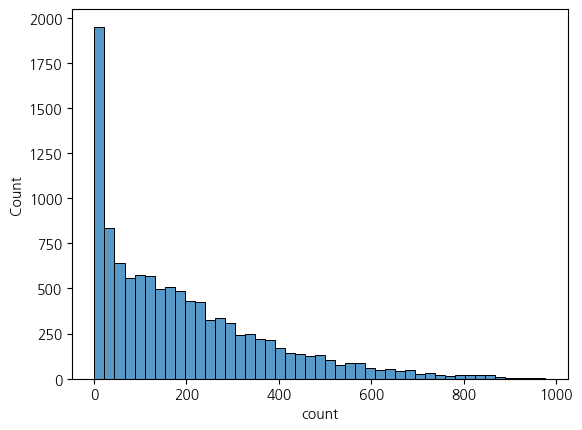

In [23]:
fig, ax = plt.subplots()
sns.histplot(train['count'])

<Axes: xlabel='count', ylabel='Count'>

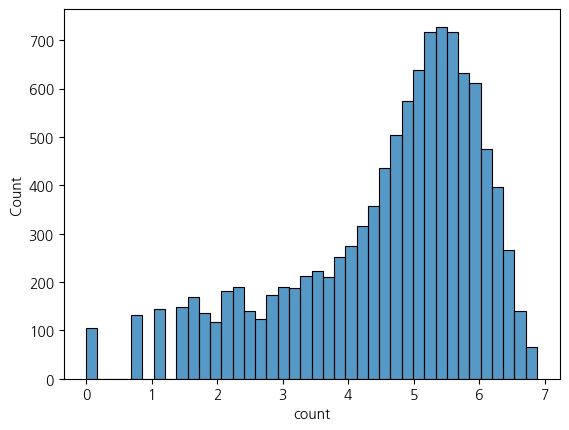

In [24]:
fig, ax = plt.subplots()
sns.histplot(np.log(train['count']))

- 첫번째 작업 완료
 + 종속변수는 로그변환을 취해서 학습을 진행하기로 한다.
 + 로그변환을 하면, 예측을 하면, 로그변환된 값을 예측
 + 로그변환된 값을 지수변환으로 변경해서 최종 예측

### 막대그래프

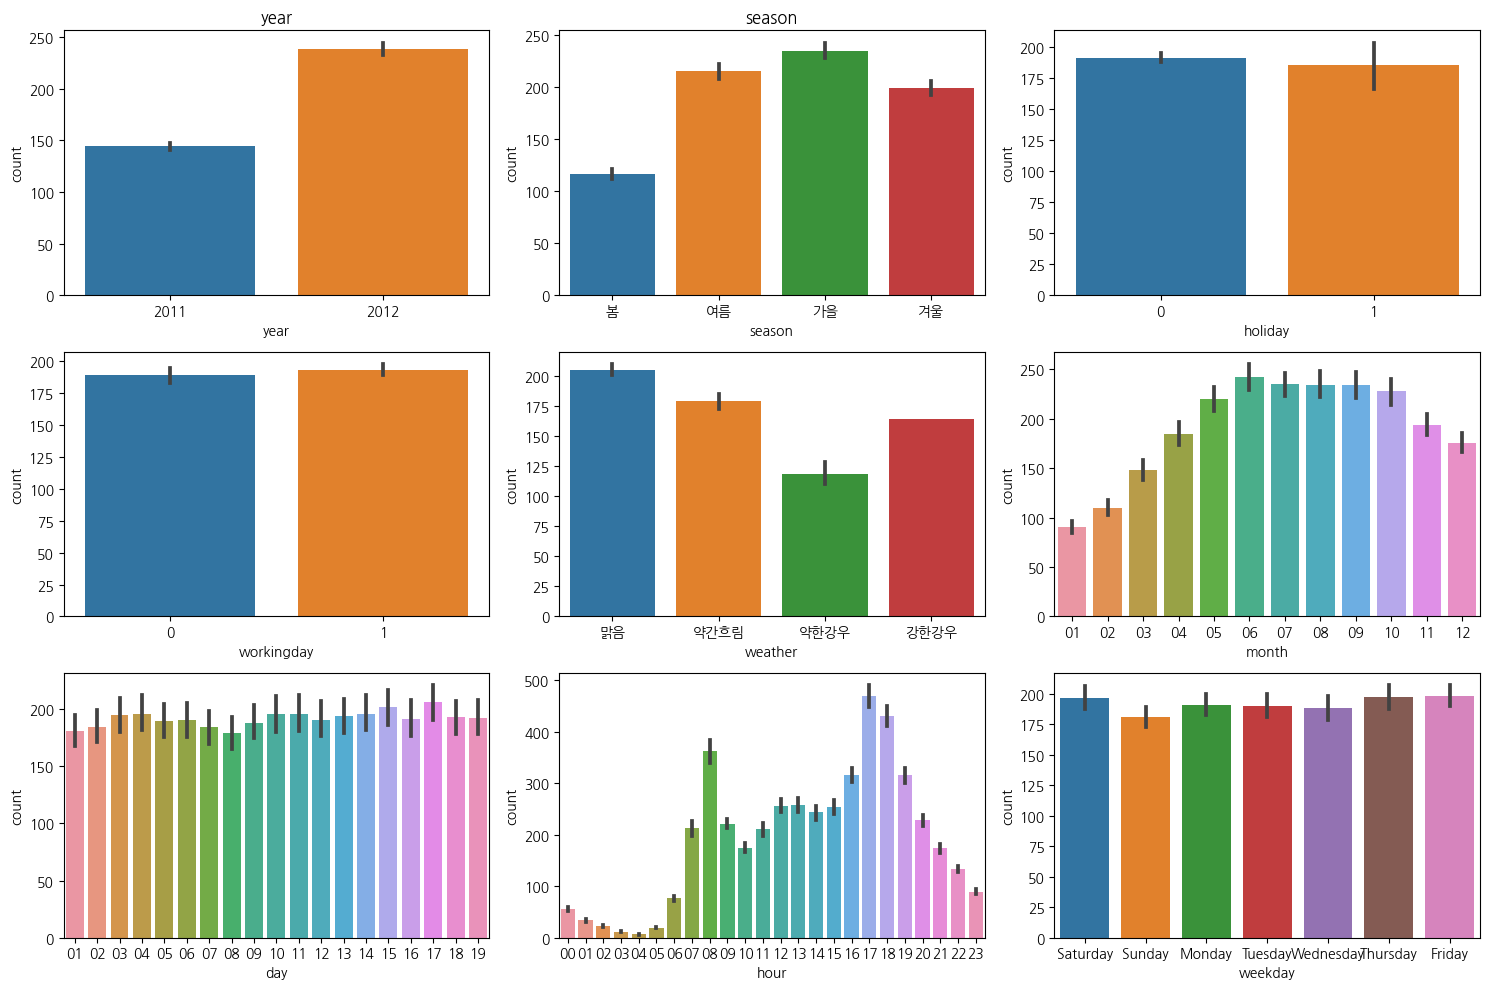

In [33]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 10))
sns.barplot(x = 'year', y = 'count', data = train, ax = ax[0, 0])
ax[0, 0].set_title("year")

sns.barplot(x = 'season', y = 'count', data = train, ax = ax[0, 1])
ax[0, 1].set_title("season")

sns.barplot(x = 'holiday', y = 'count', data = train, ax = ax[0, 2])
sns.barplot(x = 'workingday', y = 'count', data = train, ax = ax[1, 0])
sns.barplot(x = 'weather', y = 'count', data = train, ax = ax[1, 1])
sns.barplot(x = 'month', y = 'count', data = train, ax = ax[1, 2])
sns.barplot(x = 'day', y = 'count', data = train, ax = ax[2, 0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = ax[2, 1])
sns.barplot(x = 'weekday', y = 'count', data = train, ax = ax[2, 2])

plt.tight_layout()
plt.show()

In [34]:
# 'datetime' 열의 문자열로 분할하여 날짜 정보 추출
test['date'] = train['datetime'].apply(lambda x: x.split()[0])

test['year'] = train['date'].apply(lambda x: x.split('-')[0])
test['month'] = train['date'].apply(lambda x: x.split('-')[1])
test['day'] = train['date'].apply(lambda x: x.split('-')[2])

test['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
test['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
test['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

'''
# 사용한 임시 열 제거
train.drop(['date'], axis=1, inplace=True)
'''

"\n# 사용한 임시 열 제거\ntrain.drop(['date'], axis=1, inplace=True)\n"

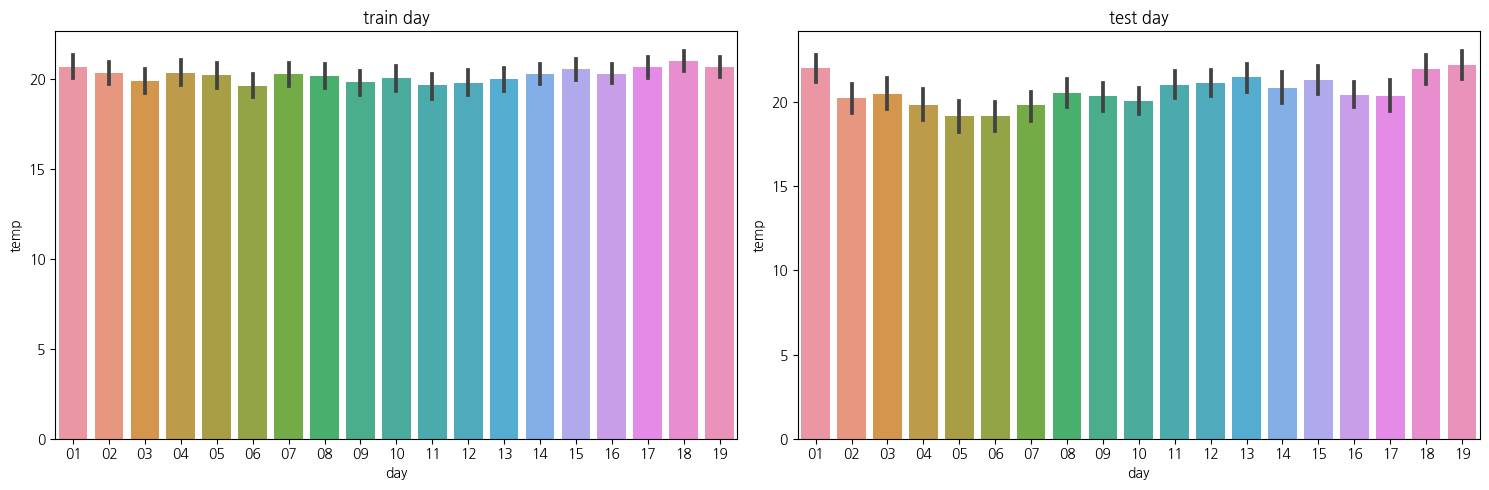

In [40]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
sns.barplot(x = 'day', y = 'temp', data = train, ax = ax[0])
ax[0].set_title("train day")

sns.barplot(x = 'day', y = 'temp', data = test, ax = ax[1])
ax[1].set_title("test day")

plt.tight_layout()
plt.show()

## day 컬럼은 제거
- day 컬럼은 제외 !! 이유 ==> train 1-19, test 20-31
 + 참조할만한 날짜가 훈련데이터에는 존재하지 않음

## second, minute 컬럼은 제거
 - 아무런 정보가 없음

In [41]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


In [42]:
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-01,2011,01,01,00,00,00


## boxplot
- season, weather, weekday, holiday
- 2x2 배열

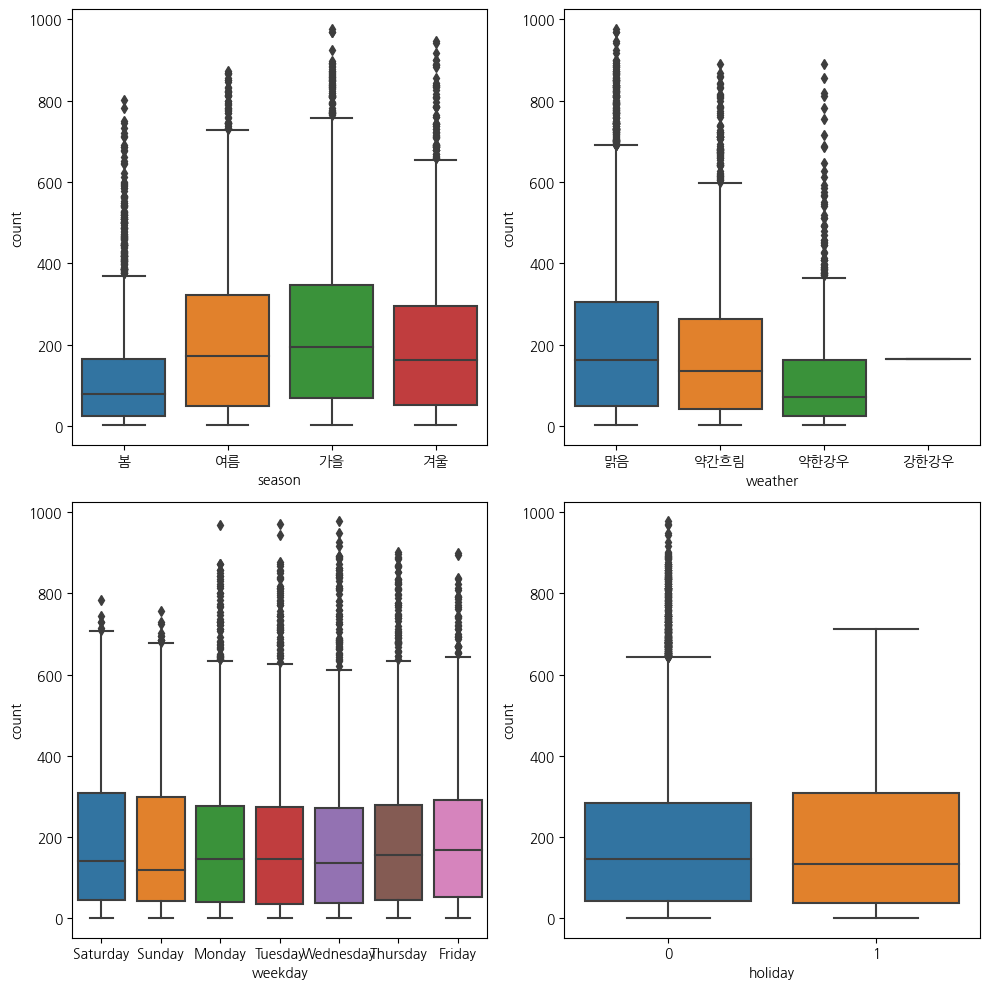

In [51]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.boxplot(data = train, x = 'season', y = 'count', ax = ax[0, 0]) # season, weather, weekday, holiyday
sns.boxplot(data = train, x = 'weather', y = 'count', ax = ax[0, 1])
sns.boxplot(data = train, x = 'weekday', y = 'count', ax = ax[1, 0])
sns.boxplot(data = train, x = 'holiday', y = 'count', ax = ax[1, 1])

plt.tight_layout()
plt.show()

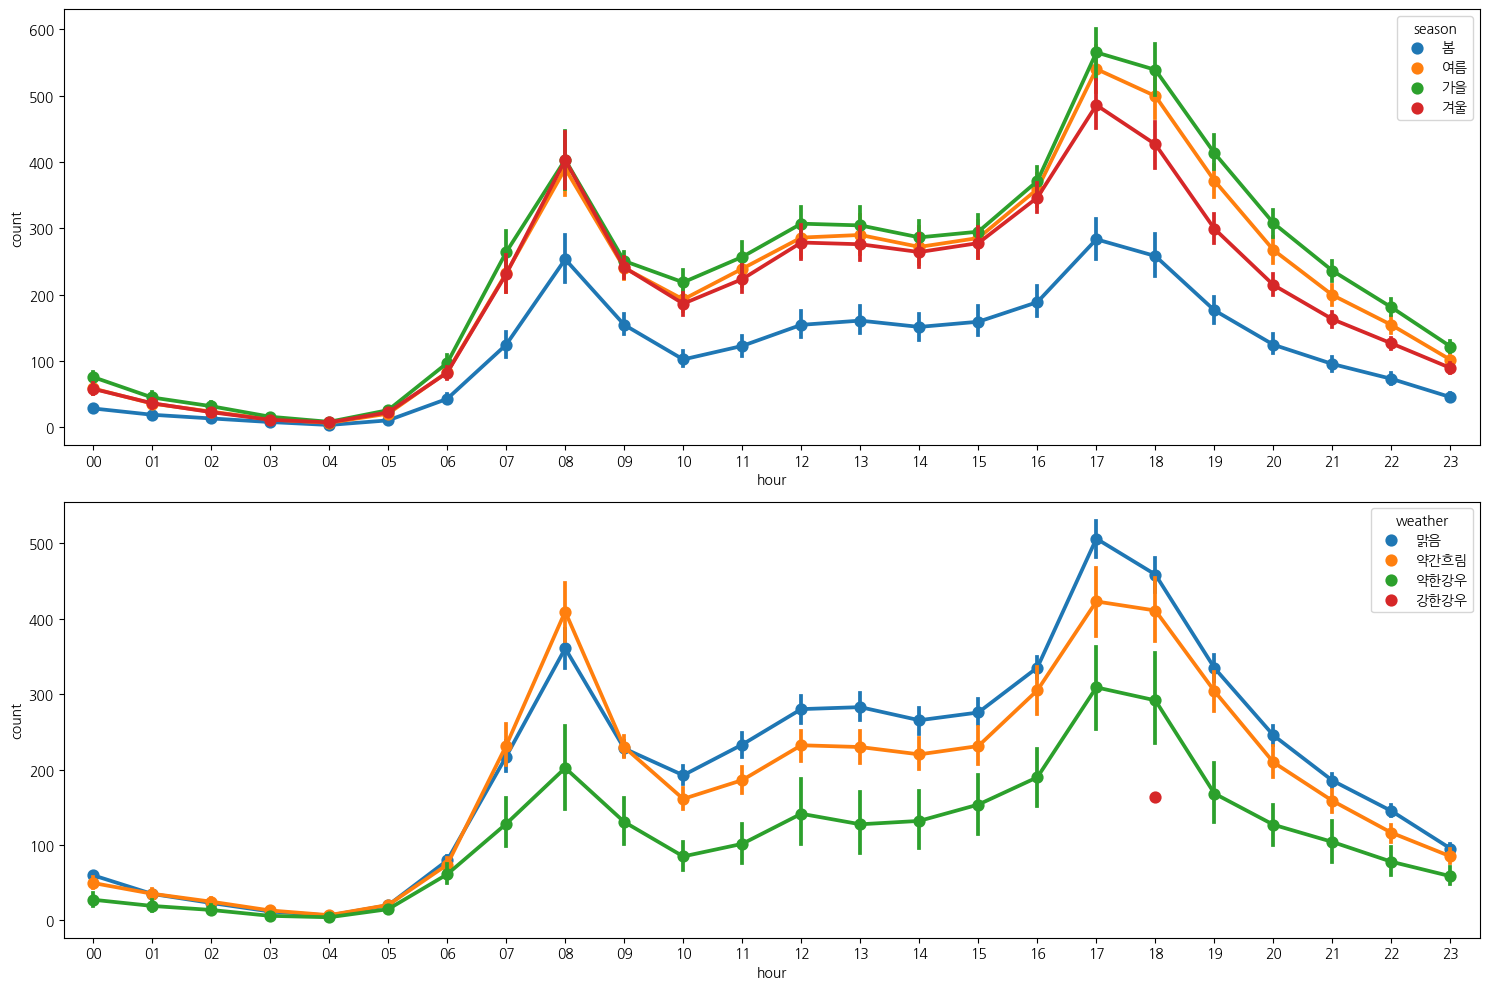

In [62]:
fig, ax = plt.subplots(nrows = 2, figsize=(15,10))

# 근무일, 공휴일, 계절, 날씨
sns.pointplot(x = 'hour', y = 'count', hue = 'season', data = train, ax = ax[0])
sns.pointplot(x = 'hour', y = 'count', hue = 'weather', data = train, ax = ax[1])
plt.tight_layout()
plt.show()

In [63]:
train['weather'].value_counts()

맑음      7192
약간흐림    2834
약한강우     859
강한강우       1
Name: weather, dtype: int64

- 첫번째 : 시스템 이상? ==> PM에게 보고 ==> 개발자 수정 피드백
- 데이터 시각화로 이상치 관측

## 강한강우가 포함된 행은 제거 Task

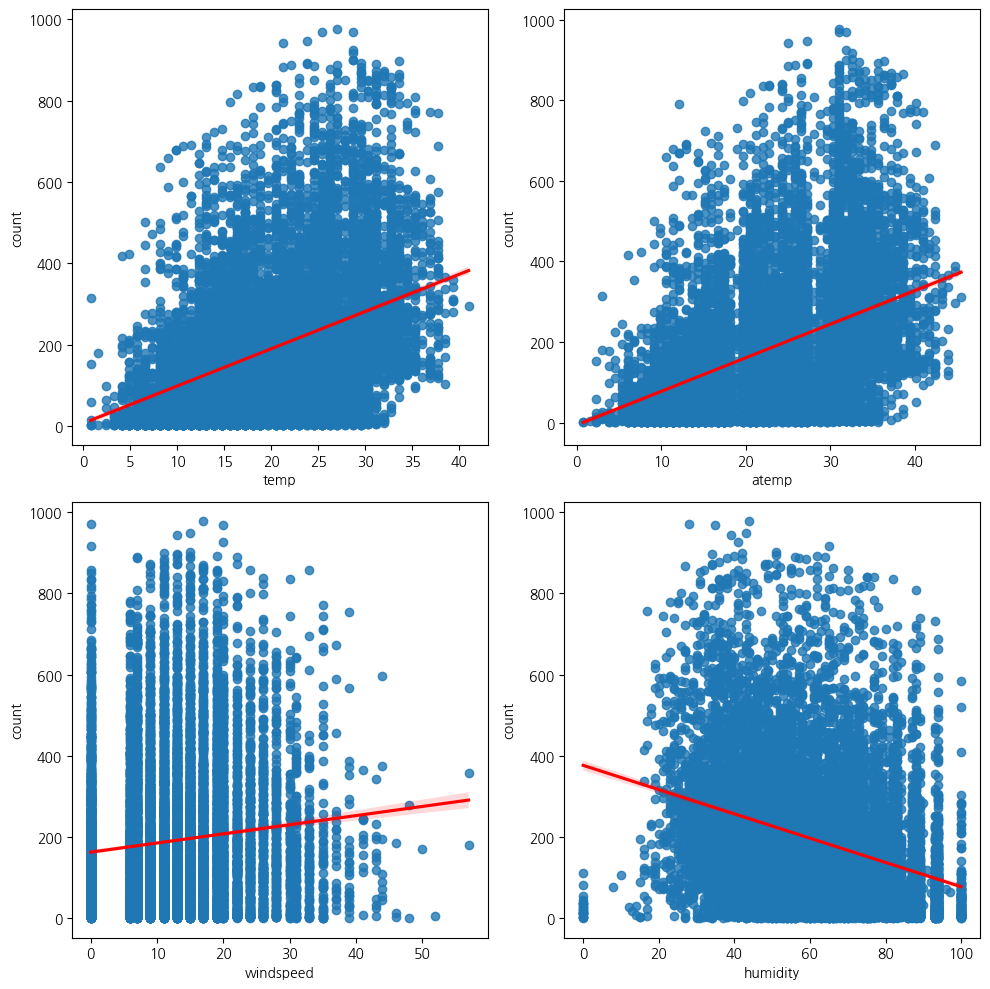

In [74]:
# 회귀식 산점도
# regplot() 사용
# 2 x 2 배열
# season, weather, weekday, holiday
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
sns.regplot(data = train, x = 'temp', y = 'count', ax = ax[0, 0], line_kws = {'color' : 'red'})
sns.regplot(data = train, x = 'atemp', y = 'count', ax = ax[0, 1], line_kws = {'color' : 'red'})
sns.regplot(data = train, x = 'windspeed', y = 'count', ax = ax[1, 0], line_kws = {'color' : 'red'})
sns.regplot(data = train, x = 'humidity', y = 'count', ax = ax[1, 1], line_kws = {'color' : 'red'})

plt.tight_layout()
plt.show()


- temp, humidity 컬럼만 쓰겠다.

## 최종적인 input 변수 선정

In [ ]:
cols = ['','','']

final_df = train.loc[train['weather'] == "강한강우", cols]

# 탐색적 데이터 분석이 끝난 데이터가 됨
# ==>> 사용할 변수를 선정하기 위해

모델링
- 평가지표 0.7
- 평가지표 0.9 까지 끌어올려야 함